# <span style="color:gray">ML_Session_4주차_과제</span>  

In [20]:
import pandas as pd
from pandas import DataFrame, Series

import numpy as np
import os

# sklearn
import sklearn

import warnings
warnings.filterwarnings(action='ignore') 

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 

# 01. SVM (총 25점)

### 01-1) SVM은 어떤 모델이고, 어떤 아이디어를 사용하나요? (5점)

#### 답)
선형 분류, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신 러닝 모델  
클래스가 다른 데이터들을 가장 큰 마진(margin)으로 분리해내는 선 또는 면을 찾아내는 것  

기본 아이디어 : 클래스 사이에 가장 폭 넓은 도로를 찾는 것  

### 01-2) SVM모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [22]:
# StandardScaler 사용한 경우
# data import
from sklearn.datasets import load_wine

# data 불러오기
wine=load_wine()
X, y = wine.data, wine.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, random_state=42)

# 적용 (4점)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X_train, y_train)


# predict (1점)

model= svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.9814814814814815


In [23]:
# StandardScaler 사용하지 않은 경우

# data import
from sklearn.datasets import load_wine

# data 불러오기
wine=load_wine()
X, y = wine.data, wine.target

# X, y 분류 (3점)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,test_size=0.3, random_state=42)

# 적용 (4점)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X_train, y_train)


# predict (1점)

model= svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.7037037037037037


### 01-3) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (3가지 이상 해보세요~) (12점)

In [54]:
# poly 사용

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=1, coef0=1,C=2))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

model= poly_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.9814814814814815


In [57]:
# poly 사용

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=1, coef0=1,C=5))
    ])
poly_kernel_svm_clf.fit(X_train, y_train)

model= poly_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.9796296296296296


In [58]:
#standardScaler을 사용했을 때, 정확도가 더 높아졌고, c=5일 때보다 c=2일 때 정확도가 더 높았다

In [81]:
# sigmoid 사용

from sklearn.svm import SVC

sigmoid_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="sigmoid", gamma= 'scale', degree=3, coef0=1, C=1))
    ])
sigmoid_kernel_svm_clf.fit(X_train, y_train)

model= sigmoid_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.8888888888888888


In [83]:
# sigmoid 사용

from sklearn.svm import SVC

sigmoid_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="sigmoid", gamma= 'scale', degree=3, coef0=1, C=100))
    ])
sigmoid_kernel_svm_clf.fit(X_train, y_train)

model= sigmoid_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.7759259259259259


In [84]:
# 마찬가지로 StandardSclaer을 사용했을 때 결과가 더 좋았으며, C가 커질수록 정확도가 떨어졌다

In [35]:
#rbf 사용
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma='scale',C=1000))
    ])
rbf_kernel_svm_clf.fit(X_train, y_train)

model= rbf_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.9814814814814815


In [85]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma='auto',C=1000))
    ])
rbf_kernel_svm_clf.fit(X_train, y_train)

model= rbf_kernel_svm_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy :', accuracy)

Accuracy : 0.9796296296296296


In [86]:
#auto일 때보다 scale을 적용했을 때 정확도가 더 높았다

# 02. Naive Bayes (총 7점)

### 02-1) Naive Bayes는 어떤 모델인가요? (5점)

In [17]:
# 답)  피처가 서로 독립이라는 가정하에 베이즈 정리를 적용한 확률 분류기 모델이다.

### 02-2) Naive Bayes가 많이 사용되는 분야는 어디인가요? (2점)

In [36]:
# 답)  문서 분류나, 스펨 메일 분류 등과 같은 빠르게 판단을 내릴 수 있는 곳에 주요로 사용된다.

---

# 03. KNN (총 34점)

### 03-1) KNN은 어떤 모델인가요? (5점)

In [37]:
# 답)  새로운 데이터가 주어지면 가장 가까운 k개 이웃의 데이터를 살펴본 뒤, 더 많은 데이터가 포함되어 있는 범주로 데이터를 예측하는 방식


### 03-2) 파라미터 n_neighbors를 작게할 경우와 많이 크게할 경우 어떤 차이점이 있나요? (3점)

In [38]:
# 답)  작게할 경우, 유연하지 않은 hard margin과 같은 값이 발생, 크게할 경우, 멀리 있는 데이터까지를 기반으로 분류하기 때문에, 값이 신뢰도가 떨어진다
# 따라서 K 값을 적절하게 설정해주어야 한다.

### 03-3) 유클리드 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [40]:
# 답)  # 답)  Minkowski 매트릭에 대한 검정력 매개변수인 p를 변경해주어야 한다. 이 때, p=2로 설정해주면 유클리드 거리를 사용하는 것과 같다


### 03-4) 맨하튼 거리를 사용하려면 파라미터를 어떻게 설정해야되나요? (3점)

In [41]:
# 답) 유클리드와 달리, p=1로 설정해주면 된다.

### 03-5) KNN모델을 불러오고, (데이터)에 적용해보세요. (총 8점)

X_train, X_test, y_train, y_test로 X와y를 분리하세요.  
test_size는 0.3, random_state는 42로 설정해주세요.  
모델은 Pipeline을 사용해서 StandardScaler도 같이 사용한 경우와 안사용했을 경우도 해보세요~  

fit할 때, X_train,y_train 사용하시고, Acuuracy 점수 낼 때는 X_test와 y_test를 사용해주세요  

In [97]:
#StandardScaler 사용한 경우
# data import
from sklearn.datasets import load_digits

# data 불러오기
digits=load_digits()
X, y = digits.data, digits.target

# X, y 분류 (3점)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.3, random_state=42)


# 적용 (4점)
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN_clf",KNeighborsClassifier(n_neighbors=3, weights='distance', p=2))
    ])
KNN_clf.fit(X_train, y_train)

model= KNN_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)


# predict (1점)
print('Accuracy :', accuracy)

Accuracy : 0.9703703703703703


In [98]:
#StandardScaler 사용하지 않은 경우
# data import
from sklearn.datasets import load_digits

# data 불러오기
digits=load_digits()
X, y = digits.data, digits.target

# X, y 분류 (3점)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.3, random_state=42)


# 적용 (4점)
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = Pipeline([
    ("KNN_clf",KNeighborsClassifier(n_neighbors=3, weights='distance', p=2))
    ])
KNN_clf.fit(X_train, y_train)

model= KNN_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)


# predict (1점)
print('Accuracy :', accuracy)


Accuracy : 0.9888888888888889


### 03-6) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)

In [102]:
# 파라미터를 변경해보세요~ (3가지 이상 해보세요~)

#1) k=5일 때

# 적용 (4점)
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN_clf",KNeighborsClassifier(n_neighbors=3=5, weights='uniform', p=2))
    ])
KNN_clf.fit(X_train, y_train)

model= KNN_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)


# predict (1점)
print('Accuracy :', accuracy)

Accuracy : 0.9685185185185186


In [105]:
#2) k=5이고, weight가 distance일 때

# 적용 (4점)
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN_clf",KNeighborsClassifier(n_neighbors=5, weights='distance', p=2))
    ])
KNN_clf.fit(X_train, y_train)

model= KNN_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)


# predict (1점)
print('Accuracy :', accuracy)

Accuracy : 0.975925925925926


In [106]:
#2) k=5이고, weight가 distance, p=1일 때

# 적용 (4점)
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("KNN_clf",KNeighborsClassifier(n_neighbors=5, weights='distance', p=1))
    ])
KNN_clf.fit(X_train, y_train)

model= KNN_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)


# predict (1점)
print('Accuracy :', accuracy)

Accuracy : 0.9740740740740741


In [107]:
#k가 5이고, weight가 distance이며, p=2일 때 정확도가 가장 높았다

# 04. Decision Tree (총 34점)

### 04-1) Decision Tree는 어떤 모델인가요? (5점)

In [109]:
# 답)  특정 규칙에 따라서 레이블을 분류하는 모델로,
#데이터의 어떤 기준을 바탕으로 규칙을 만드느냐가 성능을 결정하는 중요한 요소
#분류와 회귀, 다중 출력이 가능한 머신 러닝 알고리즘


### 04-2) 아래 그림의 빈칸을 채우세요. (각 1점)

<img src='http://drive.google.com/uc?export=view&id=1romkz8fVQ5Hg5rwCiWlrTqgUIa4GxS_X' /><br>

In [110]:
# 답)  

# 1)  root node
# 2)  sub node
# 3)  parent node
# 4) leaf node

### 04-3) DT모델을 불러오고, (데이터)에 적용해보세요. (총 13점)

#### 데이터를 불러온 뒤, X와y를 설정하고, test_size를 0.3으로 random_state는 42로 설정해서 train과 test로 나눠보세요
#### random_state를 0으로 한 경우와 다양하게 파라미터를 변경해보고, tree를 시각화했을 때 변하는 것이 있는지 확인해보세요

plot_tree(모델이름, feature_names = explt_vars, class_names = fct_val, filled = True) 을 사용해서 시각화해보세요  
ROC_AUC와 Accuarcy 점수를 구해보세요  

In [111]:
# 사용한 데이터 : breast_cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

explt_vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension']
fct_val = {0: 'malignant', 1: 'benign'}

AUC=  0.9591416813639035
Accuracy = 0.9649122807017544


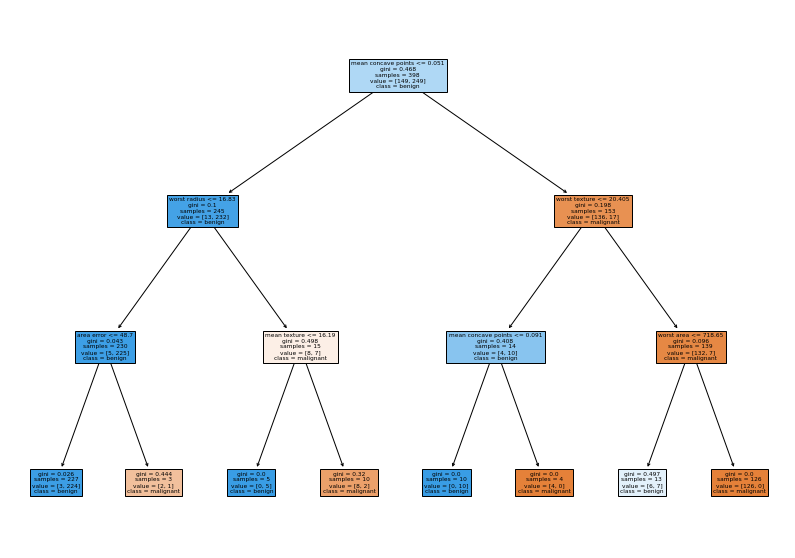

In [243]:
# (총 13점)
# X, y 분류 (3점)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# 적용 fit (4점)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# predict (2점)
from sklearn.metrics import auc

AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # AUC 
print('AUC= ', AUC)

# predict (1점)
model= tree_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy =', accuracy)

# tree 시각화 (4점)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True);


### 04-4) 파라미터를 조정해보고, 조정했을 때 어떻게 달라지는지 알아보세요. (12점)
각 파라미터가 어떤 역할을 하는지 간단하게 설명도 해주세요

AUC=  0.9539241622574957
Accuracy = 0.9298245614035088


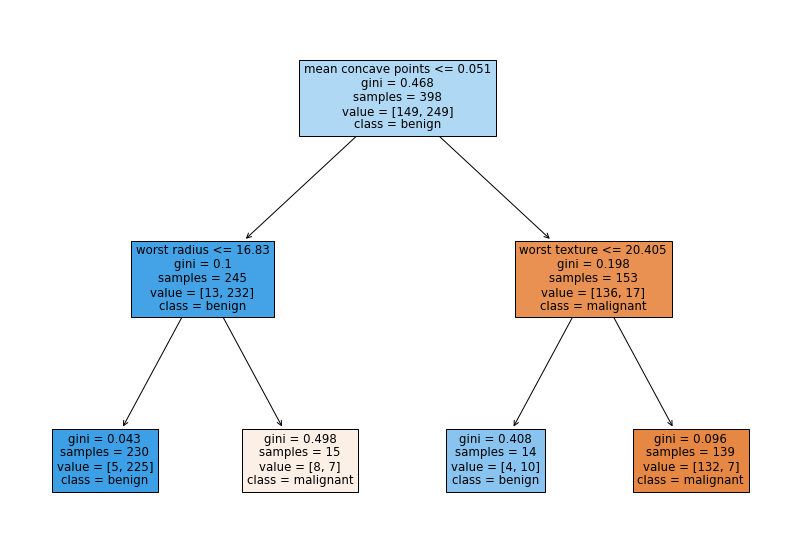

In [250]:
#1)random_state=0인경우

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X_train, y_train)

# predict (2점)
from sklearn.metrics import auc

AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # AUC 
print('AUC= ', AUC)

# predict (1점)
model= tree_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy =', accuracy)

# tree 시각화 (4점)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True);


AUC=  0.9437830687830687
Accuracy = 0.9415204678362573


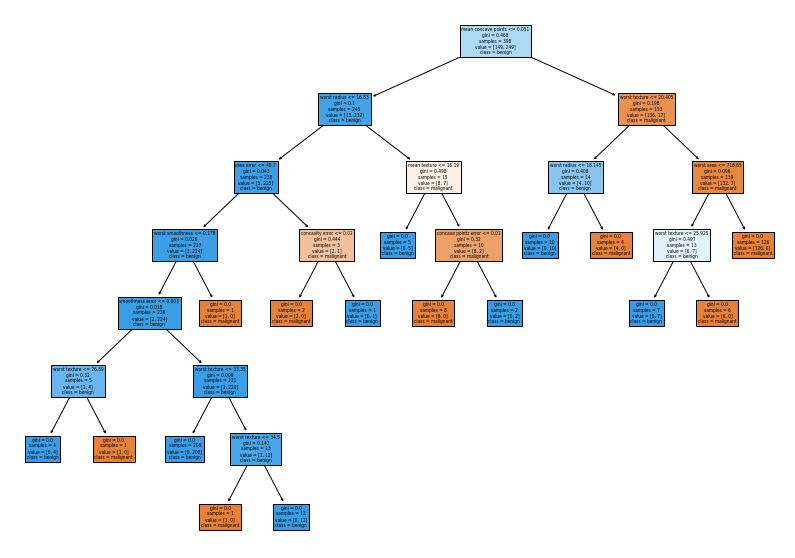

In [253]:
# 파라미터 변경 max_depth=none 인 경우

# 적용 fit (4점)
tree_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X_train, y_train)

# predict (2점)
from sklearn.metrics import auc

AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # AUC 
print('AUC= ', AUC)

# predict (1점)
model= tree_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy =', accuracy)

# tree 시각화 (4점)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True);


In [255]:
#max_depth를 none값으로 설정한 경우, 이 모델이 나눌 수 있는 최대 깊이까지 나눈다. 
#하지만 복잡한 구조를 갖게 되면 오버피팅의 가능성이 높아진다는 단점이 생긴다


AUC=  0.9539241622574957
Accuracy = 0.9532163742690059


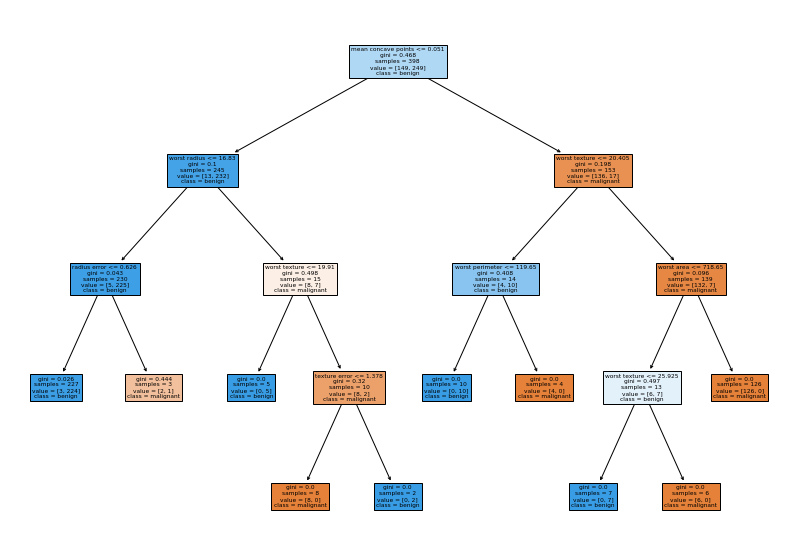

In [274]:
# 파라미터 변경 max_leaf_nodes=10로 한 경우

# 적용 fit (4점)
tree_clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10,random_state=42)

tree_clf.fit(X_train, y_train)

# predict (2점)
from sklearn.metrics import auc

AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) # AUC 
print('AUC= ', AUC)

# predict (1점)
model= tree_clf
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('Accuracy =', accuracy)

# tree 시각화 (4점)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plot_tree(tree_clf, feature_names = explt_vars, class_names = fct_val, filled = True);


In [275]:
#리프노드 값에 따라서 리프노드의 수가 바뀌게 된다. 이 경우는 10이므로 10개로 구성되었다.